In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from IPython.display import display, Math

[400 600] [500]
The critical points are [-1.  1.] [0.]


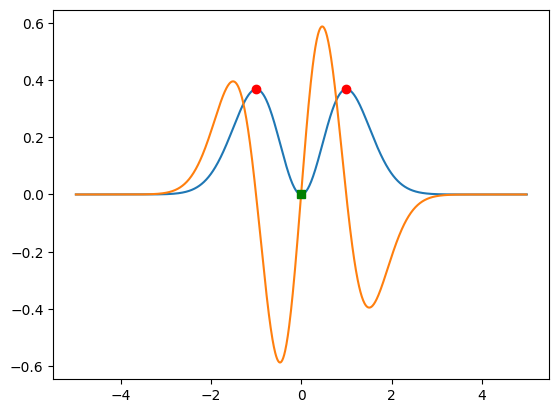

In [2]:
# empirical method
x = np.linspace(-5, 5, 1001)
fx = x**2 * np.exp(-x**2)
dfx = np.diff(fx) / (x[1] - x[0])

localmax = find_peaks(fx)[0]
localmin = find_peaks(-fx)[0]

print(localmax, localmin)

print('The critical points are ' + str(x[localmax]) + ' ' + str(x[localmin]))

plt.plot(x, fx)
plt.plot(x[0:-1], dfx)

plt.plot(x[localmax], fx[localmax], 'ro')
plt.plot(x[localmin], fx[localmin], 'gs')
plt.show()

In [3]:
# analytic method

x = sym.symbols('x')

fx = x**2 * sym.exp(-x**2)

dfx = sym.diff(fx)

critical_points = sym.solve(dfx)
critical_points

[-1, 0, 1]

In [4]:
# Determine which values of a give the function a critical value at x = 1 or x = 2
# f(x, a) = x^2 e^[-a(x^2)]
# a = [0, 0.25, .5, ..., 2]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

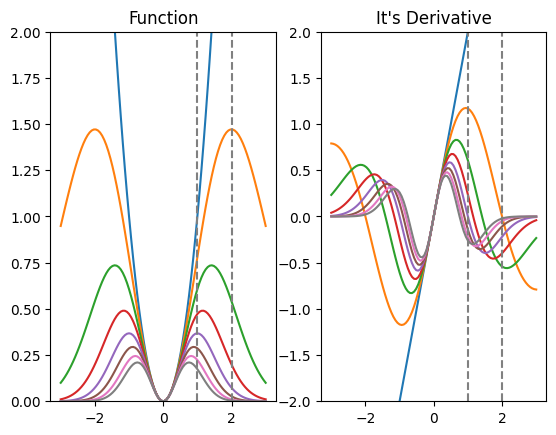

In [5]:
x =sym.symbols('x')

xrange = np.linspace(-3, 3, 100)

# setup the figure
fig, ax = plt.subplots(1, 2)

for a in np.arange(0, 2.0, .25):
    fx = x**2 * sym.exp(-a*x**2)
    
    dfx = sym.diff(fx)
    critical_points = sym.solve(dfx)

    # plotting
    ax[0].plot(xrange, sym.lambdify(x, fx)(xrange))
    ax[1].plot(xrange, sym.lambdify(x, dfx)(xrange))

    # test for derivatives
    if 1 in critical_points:
        display(Math('\\Rightarrow %s \\text { has a critical point at x=1!!! Wohoo!}' %sym.latex(fx)))
    elif 2 in critical_points:
        display(Math('\\Rightarrow %s \\text { has a critical point at x=1!!! Wohoo!}' %sym.latex(fx)))
    else:
        display(Math('\\quad %s \\text { has NO critical points at x=1 or x=2 :(}' %sym.latex(fx)))

ax[0].set_ylim([0, 2])
ax[0].set_title('Function')
ax[0].plot([1, 1], [0, 2], '--', color='gray')
ax[0].plot([2, 2], [0, 2], '--', color='gray')

ax[1].set_ylim([-2, 2])
ax[1].set_title("It's Derivative")
ax[1].plot([1, 1], [-2, 2], '--', color='gray')
ax[1].plot([2, 2], [-2, 2], '--', color='gray')

plt.show()